In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import (CountVectorizer,  # For vectorizer text
                                             TfidfVectorizer)
from sklearn.naive_bayes import (GaussianNB, 
                                 MultinomialNB)
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             roc_auc_score)
import re # Regular expresion REGEX
import nltk # For nlp

from nltk.corpus import stopwords
from nltk import ngrams
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/spam.csv")

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df_raw.sample(10)

,Category,Message
4019,ham,GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI
392,ham,Hey so this sat are we going for the intro pil...
940,ham,Better. Made up for Friday and stuffed myself ...
2900,ham,"Aight, I should be there by 8 at the latest, p..."
3495,spam,You are being contacted by our dating service ...
991,ham,26th OF JULY
2653,ham,No need for the drug anymore.
4433,ham,Dont think you need yellow card for uk travel....
2146,spam,Sunshine Hols. To claim ur med holiday send a ...
838,ham,"Sir, I have been late in paying rent for the p..."


These messages are emails, the language is English and other languages.
The categories are 'ham' and 'spam' mail.

In [5]:
def remove_stopwords(text):
    clean_text = []
    if text is not None:
        words = text.split()
        for word in words:
            if word not in stop_words:
                clean_text.append(word)
        return ' '.join(clean_text)
    else:
        return None


def remove_symbols(text):
    if text is not None:
        text = re.sub(r'''[.,?*&'"+${}-]''', '', text) # sub = replace
        return text
    else:
        return None

In [6]:
stop_words = stopwords.words('english') # remove filler words

In [7]:
# preprocessing
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ', '_')
                      .str.replace(r'\W', "")
                      .str.lower(), axis=1
    )
)

df = df_interim.copy()

df['message'] = df['message'].str.lower()

df['message_clean'] = df['message'].apply(lambda x: remove_stopwords(x))
df['message_clean'] = df['message_clean'].apply(lambda x: remove_symbols(x))
df['message_clean'] = df['message_clean'].str.replace("!", "")
df['message_clean'] = df['message_clean'].str.replace(":", "")
df['message_clean'] = df['message_clean'].str.replace("(", "")
df['message_clean'] = df['message_clean'].str.replace(")", "")
df['message_clean'] = df['message_clean'].str.replace("#", "")
df['message_clean'] = df['message_clean'].str.replace(";", "")
df.sample(10)

,category,message,message_clean
4908,ham,then anything special?,anything special
4410,spam,for your chance to win a free bluetooth headse...,chance win free bluetooth headset simply reply...
4783,ham,"call me, i am senthil from hsbc.",call me senthil hsbc
4093,ham,i remain unconvinced that this isn't an elabor...,remain unconvinced elaborate test willpower
4105,ham,do u hav any frnd by name ashwini in ur college?,u hav frnd name ashwini ur college
715,ham,he also knows about lunch menu only da. . i know,also knows lunch menu da know
2247,spam,hi ya babe x u 4goten bout me?' scammers getti...,hi ya babe x u 4goten bout me scammers getting...
4240,ham,"sez, hows u & de arab boy? hope u r all good g...",sez hows u de arab boy hope u r good give lov...
2214,ham,"goodmorning, today i am late for 2hrs. because...",goodmorning today late 2hrs back pain
4887,ham,or just do that 6times,6times


In [8]:
# EDA

df_train, df_test = train_test_split(df, test_size=0.2, random_state=2024, stratify=df['category'])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 629 to 4369
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       4457 non-null   object
 1   message        4457 non-null   object
 2   message_clean  4457 non-null   object
dtypes: object(3)
memory usage: 139.3+ KB


In [9]:
df_train['category'].value_counts()

category
ham     3859
spam     598
Name: count, dtype: int64

In [10]:
# Start ML
X_train = df_train['message_clean'].reset_index(drop=True)
y_train = df_train['category'].reset_index(drop=True)
X_test = df_test['message_clean'].reset_index(drop=True)
y_test = df_test['category'].reset_index(drop=True)

In [11]:
# Vectorizer
count_vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(sublinear_tf=True) # Term frequency inverse document frequency
X_train_vec = count_vectorizer.fit_transform(X_train)
X_test_vec = count_vectorizer.transform(X_test)

In [12]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.989237668161435


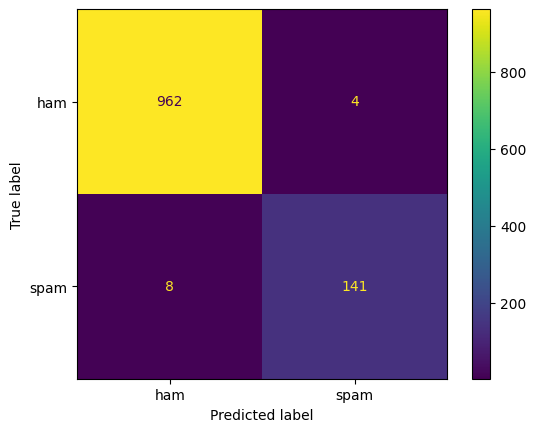

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)